In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style("whitegrid")

In [ ]:
# Read the dataset file
with open('car.data', 'r') as f:
  car_data = f.readlines()

In [ ]:
# Preprocess and clean the data
cleaned_car_data = [data.replace('\n', '').split(',') for data in car_data]

In [ ]:
# Create pandas dataframe from the cleaned car data
car_df = pd.DataFrame(cleaned_car_data, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])
car_df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Checking the details of the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Checking for missing values
car_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

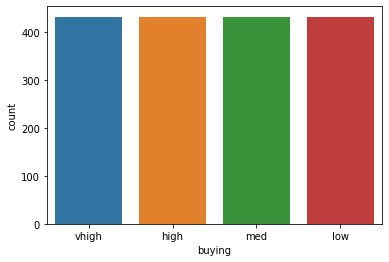

In [ ]:
# EDA of the variables
# Count of the 'buying' target variable
sns.countplot(x=car_df['buying'])

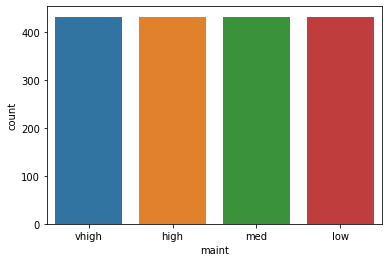

In [ ]:
# plotting unique counts of "maint"
sns.countplot(x=car_df["maint"])

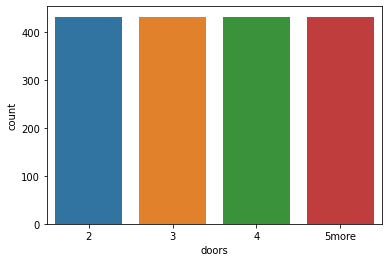

In [ ]:
# plotting unique counts of "doors"
sns.countplot(x=car_df["doors"])

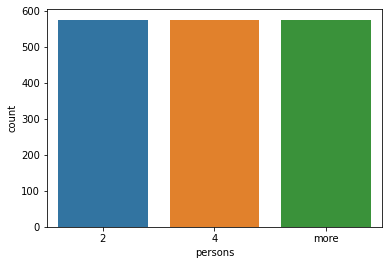

In [ ]:
# plotting unique counts of "persons"
sns.countplot(x=car_df["persons"])

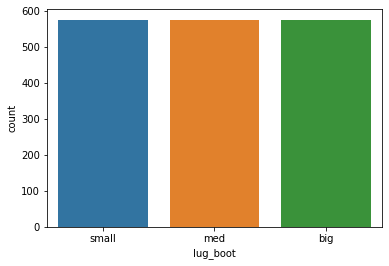

In [ ]:
# plotting unique counts of "lug_boot"
sns.countplot(x=car_df["lug_boot"])

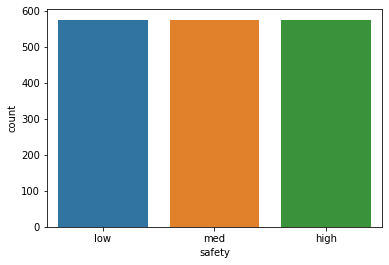

In [ ]:
# plotting unique counts of "safety"
sns.countplot(x=car_df["safety"])

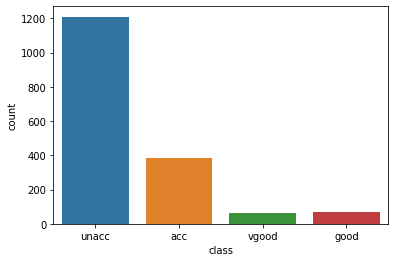

In [ ]:
# plotting unique counts of "class"
sns.countplot(x=car_df["class"])

In [ ]:
# As our target variable is categorical we need to convert them to numerical

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
car_df["buying"] = le.fit_transform(car_df['buying'])
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,vhigh,2,2,small,low,unacc
1,3,vhigh,2,2,small,med,unacc
2,3,vhigh,2,2,small,high,unacc
3,3,vhigh,2,2,med,low,unacc
4,3,vhigh,2,2,med,med,unacc


In [ ]:
# Split the variables and target variable
# X = car_df[car_df.columns[1:]]
X = car_df["class"].values.reshape(-1, 1)
y = car_df["buying"]

In [ ]:
X = pd.get_dummies(X)
X.head()

,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
# As all our variables looks ordinal categories, we will use ordinal number encoding 

maint_dict = {
    "vhigh": 3,
    "high": 2,
    "med": 1,
    "low": 0
}

doors_dict = {
    "2": 0,
    "3": 1,
    "4": 2,
    "5more": 3
}

persons_dict = {
    "2": 0,
    "4": 1,
    "more": 2
}

lug_boot_dict = {
    "small": 0,
    "med": 1,
    "big": 2
}

safety_dict = {
    "low": 0,
    "med": 1,
    "high": 2
}

class_dict = {
    "unacc": 0,
    "acc": 1,
    "good": 2,
    "vgood": 3
}

In [ ]:
# Apply the above encoding dicts to the necessary columns
mapping_dict = [maint_dict, doors_dict, persons_dict, lug_boot_dict, safety_dict, class_dict]
for idx, col in enumerate(car_df.columns[1:]):
  print(mapping_dict[idx])
  car_df[col] = car_df[col].map(mapping_dict[idx])

car_df.head()

{'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
{'2': 0, '3': 1, '4': 2, '5more': 3}
{'2': 0, '4': 1, 'more': 2}
{'small': 0, 'med': 1, 'big': 2}
{'low': 0, 'med': 1, 'high': 2}
{'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


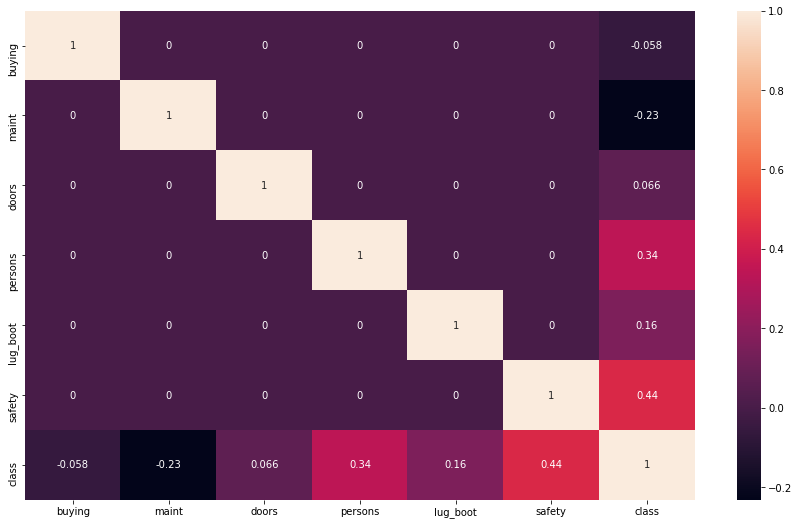

In [ ]:
# Plot the correlation map of the variables
fig=plt.figure(figsize=(15,9))
sns.heatmap(car_df.corr(), annot=True)

If we look closely the correlation map then we can find out that the target value which is being asked for "buying" has no relation with other variables apart from the variable "class".

And according to the original dataset page [Car Evaluation](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation), the target variable is "class" not "buying" and if we check the correlation map of target "class" with other variables then we can find some correlation among them unlike withe the target variable "buying".

So here I am purposing 3 types of solution.

1. Take the target variable as "buying" as it is asked.
2. Try with the original target variable "class" which is asked in the original dataset page
3. As with "buying" only "class" has relation, try to model with only that variable. 

## Target Variable: Buying

In [ ]:
# Split the variables and target variable
X = car_df[car_df.columns[1:]]
y = car_df["buying"]

In [ ]:
# Split the X and y to train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape} and y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} and y_test: {y_test.shape}")

Shape of X_train: (1296, 6) and y_train: (1296,)
Shape of X_test: (432, 6) and y_test: (432,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV

## KNN Classifier (Target: Buying)

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(f"Accuracy of knn classifier is: {knn.score(X_test, y_test)}")

Accuracy of knn classifier is: 0.16435185185185186


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.14      0.17      0.16       120
           1       0.19      0.23      0.21       103
           2       0.08      0.08      0.08       100
           3       0.30      0.17      0.21       109

    accuracy                           0.16       432
   macro avg       0.18      0.16      0.17       432
weighted avg       0.18      0.16      0.17       432



So with KNN, we can only be able to achieve an accuracy of 0.16 whereas the F1 score stands at 0.17.

In [ ]:
# Trying KNN with different number of neightbours

avg_score=[]
for k in range(2,20):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

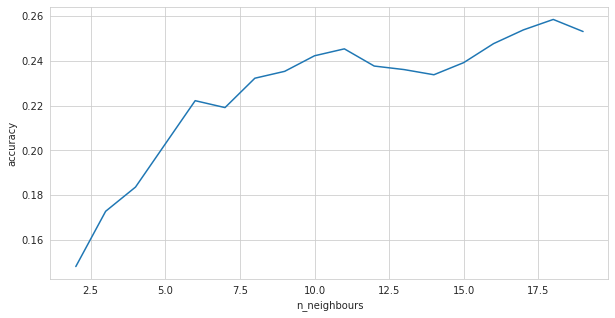

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,20, 1),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

**Conclusion:** From the above plot we can find out that even with neighbours=18, we can only reach 0.26 accuracy.

## Logistic Regression

In [ ]:
logclf=LogisticRegression()

In [ ]:
logclf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logclf.predict(X_test)

In [ ]:
logclf.score(X_test,y_test)

0.3148148148148148

With Basic default configs of Logistic Regression, we are able to get 0.31 accuracy.

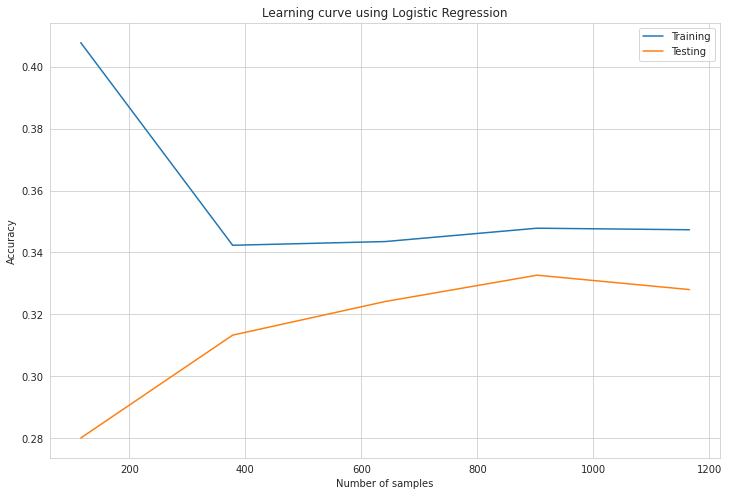

In [ ]:
lc=learning_curve(logclf,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.title("Learning curve using Logistic Regression")
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.plot(size,train_score, label="Training")
plt.legend(loc='best')
plt.plot(size,test_score, label="Testing")
plt.legend(loc='best')

In [ ]:
# Using Grid Search for hyperparameter Optimization
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Printing the best configs from the grid search
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.32716958716958716


**Conclusion:** Even with the best configuration for the Logistic Regression our accuracy touches only 0.32

## Random Forest

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
rf_clf=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rf_clf.fit(X_train,y_train)
print(f"Accuracy using Random Forest: {rf_clf.score(X_test,y_test)}")
print(f"F1 Score using Random Forest: {f1_score(y_test,rf_clf.predict(X_test),average='macro')}")

Accuracy using Random Forest: 0.0763888888888889
F1 Score using Random Forest: 0.0767738923988924


With Random Forest Classifier, we get only 0.07 accuracy which is really bad.

In [ ]:
# Using Grid Search for hyper parameter optimizatio
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}


grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [ ]:

print(f"Random forest optimized configs for the parameters: {grid.best_params_}")
print(f"Best accuracy we got using best configs for Random forest: {grid.best_score_}")

Random forest optimized configs for the parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'max_leaf_nodes': None}
Best accuracy we got using best configs for Random forest: 0.32178890876565297


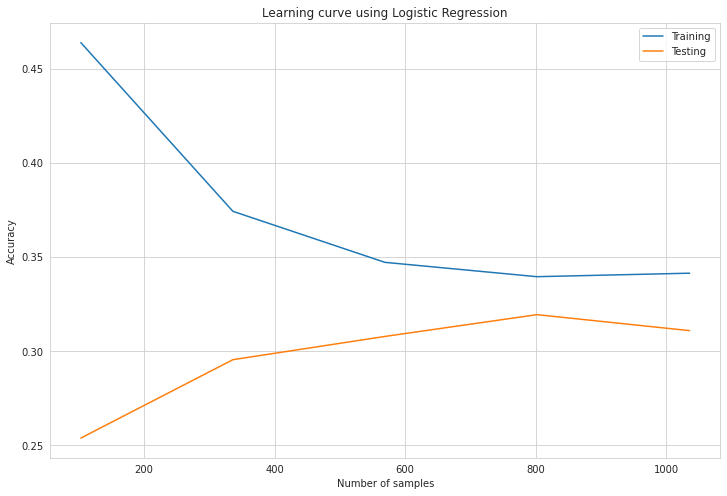

In [ ]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='gini',max_features=4,max_depth=2,random_state=42,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.title("Learning curve using Logistic Regression")
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.plot(size,train_score, label="Training")
plt.legend(loc='best')
plt.plot(size,test_score, label="Testing")
plt.legend(loc='best')

In [ ]:
feature_imp = pd.DataFrame(list(zip(X.columns, rf_clf.feature_importances_)), columns=["Feature", "Imp_score"])
feature_imp

,Feature,Imp_score
0,maint,0.236767
1,doors,0.203785
2,persons,0.141757
3,lug_boot,0.154189
4,safety,0.129136
5,class,0.134367


In [ ]:
# As safety is the least important feature we can drop that and train RF again
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X[['maint', 'persons', 'lug_boot', 'safety', 'class']],
    y, test_size=0.25, random_state=42)

In [ ]:

rf_clf_new=RandomForestClassifier(n_estimators=50,criterion='gini',max_features=4,max_depth=2,random_state=51,
    max_leaf_nodes=None,n_jobs=-1)
rf_clf_new.fit(X_train_new,y_train_new)
rf_clf_new.score(X_test_new,y_test_new)

0.32407407407407407

**Conclusion** With feature importance and best Random forest configs we get the accuracy of 32.40

## Neural Network

In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
33/33 [==============================] - 1s 8ms/step - loss: 1.4183 - accuracy: 0.2536 - val_loss: 1.3887 - val_accuracy: 0.2577
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3703 - accuracy: 0.3037 - val_loss: 1.3650 - val_accuracy: 0.2654
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3399 - accuracy: 0.3320 - val_loss: 1.3390 - val_accuracy: 0.2615
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3314 - accuracy: 0.3164 - val_loss: 1.3225 - val_accuracy: 0.2846
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3100 - accuracy: 0.3716 - val_loss: 1.3276 - val_accuracy: 0.3077
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3093 - accuracy: 0.3369 - val_loss: 1.2950 - val_accuracy: 0.3346
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 1.2768 - accuracy: 0.3581 - val_loss: 1.2881 - val_accuracy: 0.3231
Epoch 8/50
33/33 [==

In [ ]:
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='Accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

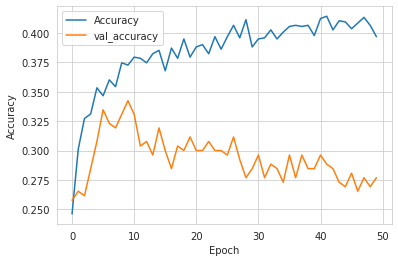

In [ ]:
plot_loss(history)

With Neural Network too the maximum accuracy on train set is 0.40 while on validation it was 0.27, and by looking at the graph it is clear that the dataset is overiftting.

**Final Conclusion** We tried simpler models to complex models and by far we have the best accuracy 0.32 without overfitting. So we will use that for our prediction.

In [ ]:
# Prediction
input = [{
    "maint": "high",
    "doors": "4",
    "persons": "2",
    "lug_boot": "big" ,
    "safety": "high",
    "class": "good"
}]
prediction_ex = pd.DataFrame(input)

for idx, col in enumerate(prediction_ex.columns):
  prediction_ex[col] = prediction_ex[col].map(mapping_dict[idx])

prediction_ex.head()

,maint,doors,persons,lug_boot,safety,class
0,2,2,0,2,2,2


In [ ]:
print(f"Buying price for the input values is: {le.inverse_transform(rf_clf.predict(prediction_ex))}")

Buying price for the input values is: ['low']


## Using Target Variable "class" as mention in [Car Evaluation](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

In [ ]:
# Split the variables and target variable
X = car_df[car_df.columns[:-1]]
y = car_df["class"]

In [ ]:
# Split the X and y to train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape} and y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} and y_test: {y_test.shape}")

Shape of X_train: (1296, 6) and y_train: (1296,)
Shape of X_test: (432, 6) and y_test: (432,)


## KNN Classifier (Target: "Class")

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(f"Accuracy of knn classifier is: {knn.score(X_test, y_test)}")

Accuracy of knn classifier is: 0.8773148148148148


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       294
           1       0.84      0.69      0.76       103
           2       0.46      0.40      0.43        15
           3       0.92      0.55      0.69        20

    accuracy                           0.88       432
   macro avg       0.78      0.66      0.70       432
weighted avg       0.87      0.88      0.87       432



So with KNN, we can able to achieve an accuracy of 0.87 whereas the F1 score stands at 0.70.

In [ ]:
# Trying KNN with different number of neightbours

avg_score=[]
for k in range(2,20):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

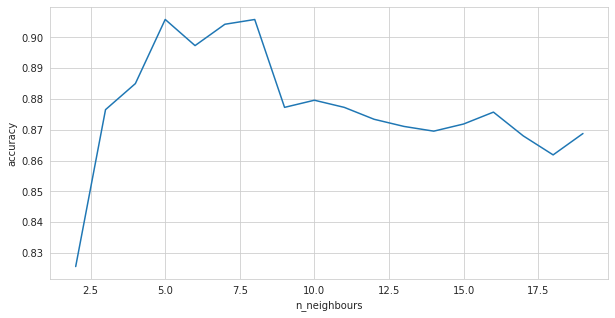

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,20, 1),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

**KNN Conclusion:** From the above plot we can find out that even with neighbours=5, we can only reach 0.90 accuracy.

## Logistic Regression

In [ ]:
logclf=LogisticRegression()

In [ ]:
logclf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logclf.predict(X_test)

In [ ]:
print(f"Accuracy using Logistic Regression: {logclf.score(X_test,y_test)}")

Accuracy using Logistic Regression: 0.7361111111111112


With Basic default configs of Logistic Regression, we are able to get 0.73 accuracy.

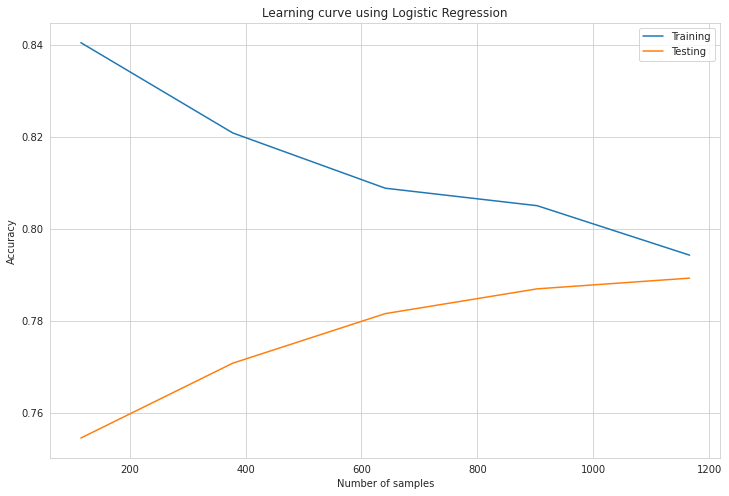

In [ ]:
lc=learning_curve(logclf,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.title("Learning curve using Logistic Regression")
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.plot(size,train_score, label="Training")
plt.legend(loc='best')
plt.plot(size,test_score, label="Testing")
plt.legend(loc='best')

In [ ]:
# Using Grid Search for hyperparameter Optimization
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Printing the best configs from the grid search
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'multi_class': 'multinomial', 'solver': 'sag'}
0.7916602316602317


**LR Conclusion:** With the best configuration for the Logistic Regression our accuracy touches only 0.79

## Random Forest

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
rf_clf=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rf_clf.fit(X_train,y_train)
print(f"Accuracy using Random Forest: {rf_clf.score(X_test,y_test)}")
print(f"F1 Score using Random Forest: {f1_score(y_test,rf_clf.predict(X_test),average='macro')}")

Accuracy using Random Forest: 0.9652777777777778
F1 Score using Random Forest: 0.8906834185029674


With Random Forest Classifier, we get only 0.96 accuracy and F1 0.89 which is very good compare to having target as "buying".

In [ ]:
# Using Grid Search for hyper parameter optimizatio
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}


grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [ ]:
print(f"Random forest optimized configs for the parameters: {grid.best_params_}")
print(f"Best accuracy we got using best configs for Random forest: {grid.best_score_}")

Random forest optimized configs for the parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
Best accuracy we got using best configs for Random forest: 0.9745557543231962


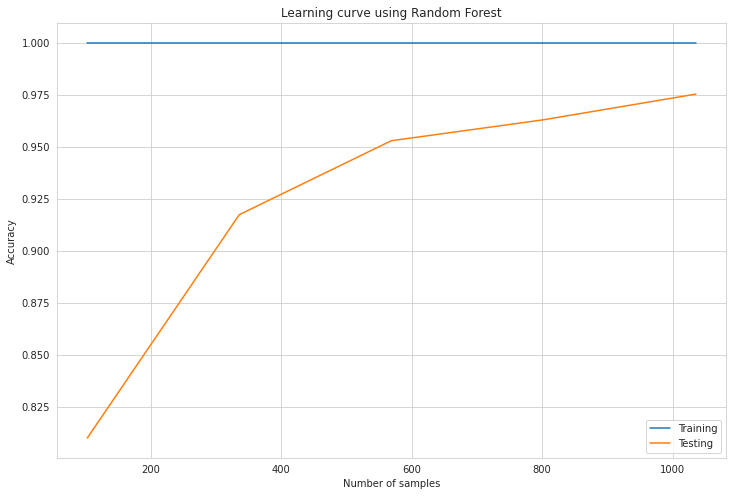

In [ ]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=4,max_depth=20,random_state=42,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.title("Learning curve using Random Forest")
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.plot(size,train_score, label="Training")
plt.legend(loc='best')
plt.plot(size,test_score, label="Testing")
plt.legend(loc='best')

In [ ]:
feature_imp = pd.DataFrame(list(zip(X.columns, rf_clf.feature_importances_)), columns=["Feature", "Imp_score"])
feature_imp

,Feature,Imp_score
0,buying,0.187434
1,maint,0.140415
2,doors,0.067534
3,persons,0.239066
4,lug_boot,0.090542
5,safety,0.275010


In [ ]:
# As doors is the least important feature we can drop that and train RF again
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X[['buying', 'maint', 'persons', 'lug_boot', 'safety']],
    y, test_size=0.25, random_state=42)

In [ ]:

rf_clf_new=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=4,max_depth=20,random_state=42,
    max_leaf_nodes=None,n_jobs=-1)
rf_clf_new.fit(X_train_new,y_train_new)
rf_clf_new.score(X_test_new,y_test_new)

0.9282407407407407

**RF Conclusion** With feature importance and best Random forest configs we get the accuracy of 0.92, But earlier without feature importance we were able to achieve 0.97 with the best configs for Random Forest

## Neural Network

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 1.0139 - accuracy: 0.5657 - val_loss: 0.8544 - val_accuracy: 0.6462
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.7336 - val_loss: 0.6726 - val_accuracy: 0.7462
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7859 - val_loss: 0.5885 - val_accuracy: 0.7615
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8302 - val_loss: 0.5253 - val_accuracy: 0.7808
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8206 - val_loss: 0.4961 - val_accuracy: 0.7731
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8327 - val_loss: 0.4444 - val_accuracy: 0.7923
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8448 - val_loss: 0.4229 - val_accuracy: 0.7885
Epoch 8/50
33/33 [==

In [ ]:
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='loss')
  plt.plot(history.history['val_accuracy'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)

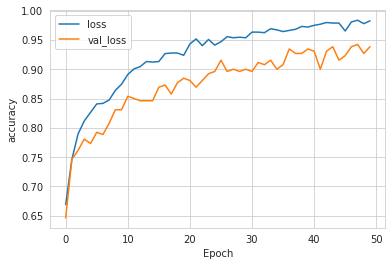

In [ ]:
plot_loss(history)

With Neural Network too we werre able to achieve around 0.97-0.98 accuracy on train set while validation was around 0.95

**Final Conclusion** With all models having "class" as our target variable we were easily achieve the accuracy of 0.97.

## Target Variable: buying and Variable: Class

As we saw earliear in the heatmap, only "class" variable was showing any correlation with target "buying"  and with other variable it was zero, so we will try to build a model with only variable class.

In [ ]:
x = car_df["class"].values.reshape(-1, 1)
y = car_df["buying"]

In [ ]:
# Split the X and y to train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape} and y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} and y_test: {y_test.shape}")

Shape of X_train: (1296, 1) and y_train: (1296,)
Shape of X_test: (432, 1) and y_test: (432,)


## KNN Classifier (Target: Buying)

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(f"Accuracy of knn classifier is: {knn.score(X_test, y_test)}")

Accuracy of knn classifier is: 0.23148148148148148


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.26      0.23      0.24       120
           1       0.22      0.66      0.33       103
           2       0.33      0.05      0.09       100
           3       0.00      0.00      0.00       109

    accuracy                           0.23       432
   macro avg       0.20      0.23      0.16       432
weighted avg       0.20      0.23      0.17       432



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So with KNN, we can only be able to achieve an accuracy of 0.23 whereas the F1 score stands at 0.16. Which is quite higher than taking all variables though in terms of accuracy.

In [ ]:
# Trying KNN with different number of neightbours

avg_score=[]
for k in range(2,20):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

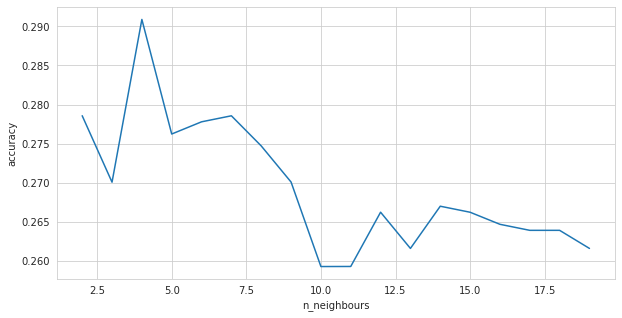

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,20, 1),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

**Conclusion:** From the above plot we can find out that even with neighbours=4, we can only reach 0.29 accuracy.

## Logistic Regression

In [ ]:
logclf=LogisticRegression()

In [ ]:
logclf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logclf.predict(X_test)

In [ ]:
logclf.score(X_test,y_test)

0.3194444444444444

With Basic default configs of Logistic Regression, we are able to get 0.31 accuracy.

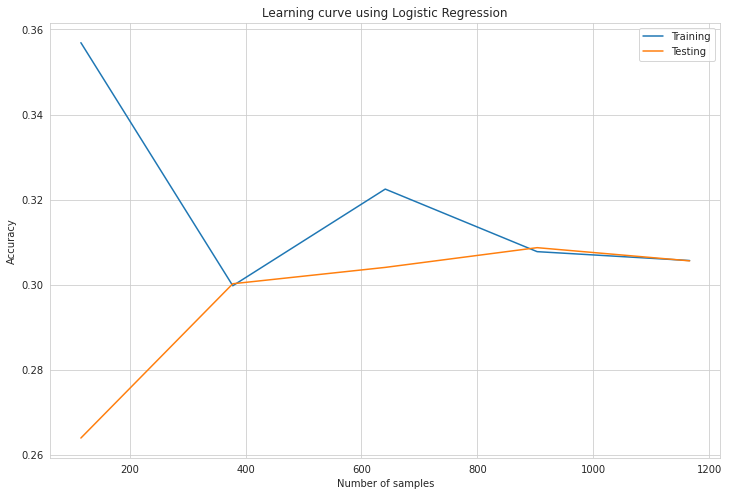

In [ ]:
lc=learning_curve(logclf,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.title("Learning curve using Logistic Regression")
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.plot(size,train_score, label="Training")
plt.legend(loc='best')
plt.plot(size,test_score, label="Testing")
plt.legend(loc='best')

In [ ]:
# Using Grid Search for hyperparameter Optimization
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Printing the best configs from the grid search
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.30556578556578556


**Conclusion:** Even with the best configuration for the Logistic Regression our accuracy is 0.30

## Random Forest

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
rf_clf=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rf_clf.fit(X_train,y_train)
print(f"Accuracy using Random Forest: {rf_clf.score(X_test,y_test)}")
print(f"F1 Score using Random Forest: {f1_score(y_test,rf_clf.predict(X_test),average='macro')}")

Accuracy using Random Forest: 0.3402777777777778
F1 Score using Random Forest: 0.2739747194818047


With Random Forest Classifier, we get 0.34 accuracy which is an improvement over the random forest which was trained on every features.

In [ ]:
# Using Grid Search for hyper parameter optimizatio
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}


grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [ ]:
print(f"Random forest optimized configs for the parameters: {grid.best_params_}")
print(f"Best accuracy we got using best configs for Random forest: {grid.best_score_}")

Random forest optimized configs for the parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 3}
Best accuracy we got using best configs for Random forest: 0.30787716159809186


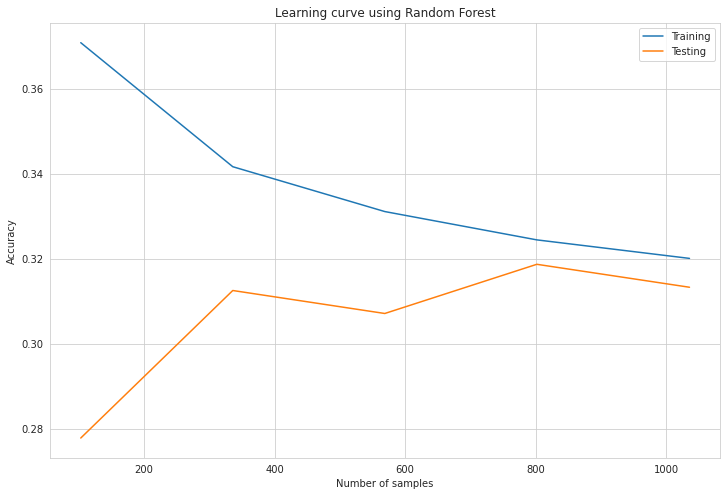

In [ ]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='gini',max_features='auto',max_depth=2,random_state=42,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.title("Learning curve using Random Forest")
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.plot(size,train_score, label="Training")
plt.legend(loc='best')
plt.plot(size,test_score, label="Testing")
plt.legend(loc='best')

**Conclusion** With having random forest best configs we were able to achieve 0.34 accuracy.

## Neural Network

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
33/33 [==============================] - 1s 8ms/step - loss: 1.3885 - accuracy: 0.2335 - val_loss: 1.3464 - val_accuracy: 0.3038
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3564 - accuracy: 0.3242 - val_loss: 1.3398 - val_accuracy: 0.3038
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3494 - accuracy: 0.3200 - val_loss: 1.3366 - val_accuracy: 0.3038
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3491 - accuracy: 0.3313 - val_loss: 1.3334 - val_accuracy: 0.3115
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3524 - accuracy: 0.2998 - val_loss: 1.3296 - val_accuracy: 0.3038
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3462 - accuracy: 0.3097 - val_loss: 1.3270 - val_accuracy: 0.3115
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 1.3484 - accuracy: 0.3039 - val_loss: 1.3257 - val_accuracy: 0.3115
Epoch 8/50
33/33 [==

In [ ]:
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='Accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

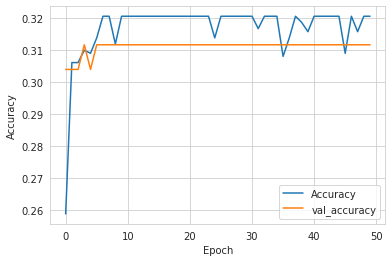

In [ ]:
plot_loss(history)

**NN Conclusing:** So after training Neural network we got around 0.32 accuracy on training and 0.31 on validation.

**Conclusion**: Having just one feature we manage to get 0.34 at best which is quite similar to what we have already training with all features. Which shows that other variables with having target variable "buying" doesn't contribute anything to the training whereas taking the target "class" we were able to get an accuracy of 0.97 which is quite larger than what we have with it's counterpart.